# Volume 4: Hysteresis
    <Name> Dallin Stewart
    <Class> ACME 002
    <Date> "I bought a ward against it off a traveling fortune-teller, It lets me add two 'n' two and get a pickle."

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.integrate import solve_ivp

In [3]:
def embedding_alg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1e-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

$x = λx − x^3$

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

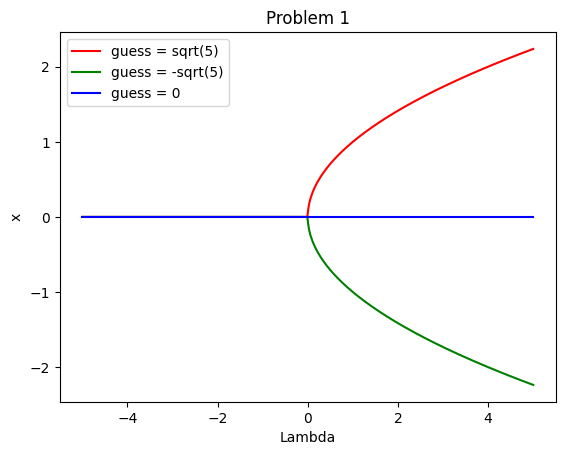

In [5]:
# initialize the function and the list of parameters
f = lambda x, a: a*x - x**3
a_list = np.linspace(5, -5, 500)
guess1 = 0
guess2 = np.sqrt(5)
guess3 = -np.sqrt(5)

# run the algorithm for each guess
c1, x1 = embedding_alg(a_list, guess1, f)
c2, x2 = embedding_alg(a_list, guess2, f)
c3, x3 = embedding_alg(a_list, guess3, f)

# plot the results
plt.plot(c2, x2, 'r', label='guess = sqrt(5)')
plt.plot(c3, x3, 'g', label='guess = -sqrt(5)')
plt.plot(c1, x1, 'b', label='guess = 0')

# set plot parameters
plt.title('Problem 1')
plt.xlabel('Lambda')
plt.ylabel('x')
plt.legend()
plt.show()


# Problem 2
Find the trajectory of $x' = \lambda x-x^3,$
using the points 

$(\lambda, x_0)\in \left\{\left(\frac{1}{2},\frac{1}{2}\right), \left(\frac{1}{2},\frac{-1}{2}\right), \left(\frac{-1}{2},\frac{1}{2}\right), \left(\frac{-1}{2},\frac{-1}{2}\right) \right\}. $

and the initial condition $x(0)=x_0$ using solve_ivp.
Be sure to include a legend.

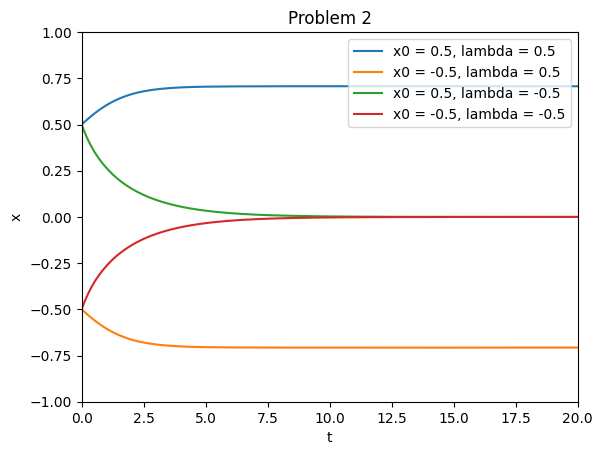

In [19]:
# initialize the list of parameters, initial conditions, and functions
lambdas = [0.5, 0.5, -0.5, -0.5]
xs = [0.5, -0.5, 0.5, -0.5]
fs = [lambda t, y, a=a: [a*y[0] - y[0]**3] for a in lambdas]

# set domain and solve the IVPs
t_span = (0, 20)
t = np.linspace(0, 20, 1000)
sols = [solve_ivp(_f, t_span, y0=[x], args=(a,), t_eval=t) for x, a, _f in zip(xs, lambdas, fs)]

# plot the results
for sol, x, lm in zip(sols, xs, lambdas):
    plt.plot(sol.t, sol.y[0], label=f'x0 = {x}, lambda = {lm}')

# set plot parameters
plt.title('Problem 2')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.xlim(0, 20)
plt.ylim(-1, 1)
plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

$\frac{dx}{dτ} = rx(1 − x/k) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$.
Be sure to include a legend.

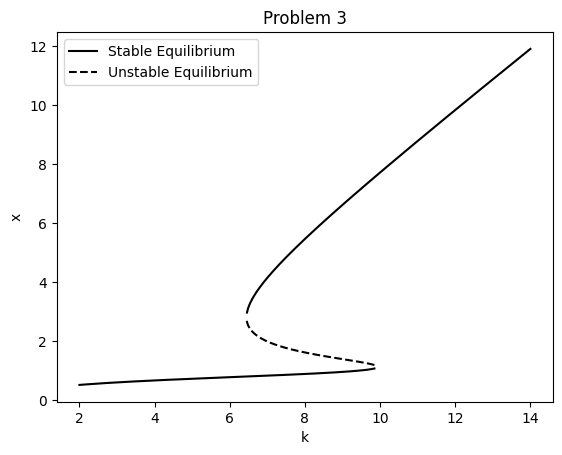

In [32]:
# initialize function
r = 0.56
ks = [8, 1, 3]
dx = lambda x, k: r*x*(1 - x/k) - x**2/(1 + x**2)

# initializse domains
t1 = np.linspace(14, 0.01, 500)
t2 = np.linspace(9.85, 2, 200)
t3 = np.linspace(9.85, 6.45, 200)
ts = [t1, t2, t3]

# set plot parameters
labels = ["Stable Equilibrium", None, "Unstable Equilibrium"]
colors = ["k", "k", "--k"]

# run the algorithm for each domain and plot the results
for t, k, label, clor in zip(ts, ks, labels, colors):
    c, x = embedding_alg(t, k, dx)
    plt.plot(c, x, clor, label=label)

# set plot parameters
plt.title('Problem 3')
plt.xlabel('k')
plt.ylabel('x')
plt.legend()
plt.show()

# Problem 4
Using the time-dependent carrying-capacity

$k(t) = \begin{cases}
  8  & t \in [0,60) \\
  12  & t \in [60,150) \\
  8 & t \in [150,220) \\
  6 & t \in [220,300) \\
\end{cases},$

solve the IVP

$\frac{dx}{dτ} = rx(1 − x/k(t)) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$ and $x(0)=x_0=0.3.$
Be sure to include a legend.

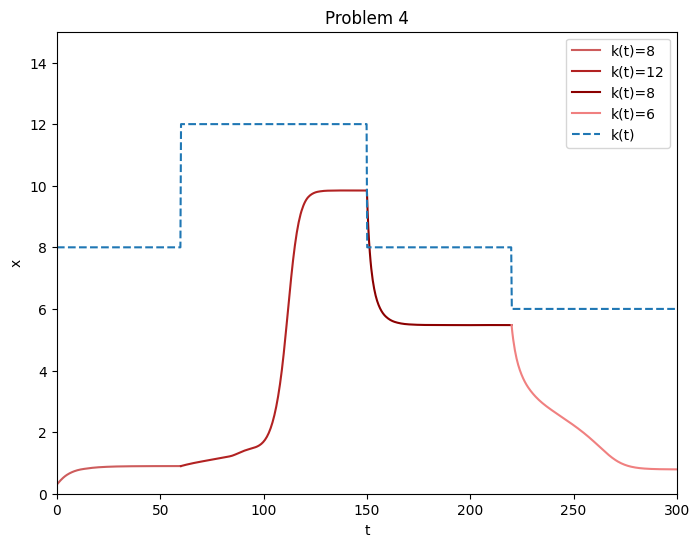

In [48]:
r = 0.56
x0 = 0.3
ks = [8, 12, 8, 6]
t_spans = [(0, 60), (60, 150), (150, 220), (220, 300)]
red_shades = ['indianred', 'firebrick', 'darkred', 'lightcoral']

# Define the differential equation
def dx(t, x, k):
    return r * x * (1 - x / k) - x**2 / (1 + x**2)

# Solve the IVPs and calculate k values
sols = []
for t_span, k in zip(t_spans, ks):
    t_eval = np.linspace(t_span[0], t_span[1], 200)
    sols.append(solve_ivp(dx, t_span, y0=[x0], args=(k,), t_eval=t_eval))
    x0 = sols[-1].y[0][-1]

# Plot the results
plt.figure(figsize=(8,6))
for sol, t_span, k, red_shade in zip(sols, t_spans, ks, red_shades):
    plt.plot(sol.t, sol.y[0], red_shade, label=f"k(t)={k}")

# Plot the carrying capacity as a function of time
domain = np.linspace(0, 300, 1000)
value = [ks[0] if t < 60 else (ks[1] if t < 150 else (ks[2] if t < 220 else ks[3])) for t in domain]
plt.plot(domain, value, '--', label='Carrying Capacity')

# Set plot parameters
plt.title('Problem 4')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.xlim(0, 300)
plt.ylim(0, 15)
plt.show()
